In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, FixedLocator,
                               FuncFormatter, AutoMinorLocator)

pd.set_option('display.float_format','{:,.2f}'.format)

In [233]:
xls = pd.ExcelFile('electricity.xlsx')
df1 = pd.read_excel(io=xls, sheet_name='Table 2', header = 0)

In [234]:
print(df1)

                                   Return to contents  Unnamed: 1  Unnamed: 2  \
0                                                 NaN         NaN         NaN   
1                                                 NaN         NaN         NaN   
2                                                 NaN         NaN         NaN   
3                                                 NaN         NaN         NaN   
4                                                 NaN         NaN         NaN   
..                                                ...         ...         ...   
69  2. 1 Gigawatt Hour (GWh) = 0.0036 Petajoules (...         NaN         NaN   
70     3. Distributed Solar PV Generation has been...         NaN         NaN   
71  4. Waste heat includes heat from chemical proc...         NaN         NaN   
72  5. Compiled based on actual quarterly sales da...         NaN         NaN   
73  6. Compiled based on estimated quarterly sales...         NaN         NaN   

    Unnamed: 3  Unnamed: 4 

In [235]:
df1.shape

(74, 53)

## Cleaning empty rows

In [236]:
df1=df1.dropna(axis=0, how='all', 
           #thresh=None, subset=None, 
           inplace=False)

In [237]:
df1.shape

(61, 53)

In [238]:
df1

,Return to contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
5,Annual electricity generation and consumption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Calendar year,"1,974.00","1,975.00","1,976.00","1,977.00","1,978.00","1,979.00","1,980.00","1,981.00","1,982.00",...,"2,016.00","2,017.00","2,018.00","2,019.00","2,020.00","2,021.00",Annual % change,NaN,NaN,NaN
9,"Net Generation (GWh)1,2","20,479.18","20,423.63","21,523.78","22,095.78","22,157.84","22,478.04","23,016.10","23,594.85","24,879.23",...,"42,919.02","43,311.00","43,420.88","43,819.67","43,182.24","43,112.01",-0.00,NaN,NaN,NaN
10,Hydro,"15,037.00","16,497.00","15,344.00","14,573.00","15,503.00","18,259.00","19,171.00","19,483.00","18,121.00",...,"25,675.70","24,924.10","25,992.03","25,342.67","24,025.51","23,980.98",-0.00,NaN,NaN,NaN
11,Geothermal,"1,358.00","1,350.00","1,290.00","1,217.00","1,239.00","1,118.00","1,206.00","1,141.00","1,158.00",...,"7,737.94","7,779.14","7,729.29","7,793.36","7,833.57","7,820.07",-0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2. 1 Gigawatt Hour (GWh) = 0.0036 Petajoules (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,3. Distributed Solar PV Generation has been...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,4. Waste heat includes heat from chemical proc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,5. Compiled based on actual quarterly sales da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
df1.rename(columns = {'Return to contents':'number'}, inplace = True)
df1.head()

,number,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
5,Annual electricity generation and consumption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Calendar year,"1,974.00","1,975.00","1,976.00","1,977.00","1,978.00","1,979.00","1,980.00","1,981.00","1,982.00",...,"2,016.00","2,017.00","2,018.00","2,019.00","2,020.00","2,021.00",Annual % change,NaN,NaN,NaN
9,"Net Generation (GWh)1,2","20,479.18","20,423.63","21,523.78","22,095.78","22,157.84","22,478.04","23,016.10","23,594.85","24,879.23",...,"42,919.02","43,311.00","43,420.88","43,819.67","43,182.24","43,112.01",-0.00,NaN,NaN,NaN
10,Hydro,"15,037.00","16,497.00","15,344.00","14,573.00","15,503.00","18,259.00","19,171.00","19,483.00","18,121.00",...,"25,675.70","24,924.10","25,992.03","25,342.67","24,025.51","23,980.98",-0.00,NaN,NaN,NaN
11,Geothermal,"1,358.00","1,350.00","1,290.00","1,217.00","1,239.00","1,118.00","1,206.00","1,141.00","1,158.00",...,"7,737.94","7,779.14","7,729.29","7,793.36","7,833.57","7,820.07",-0.00,NaN,NaN,NaN


## Transpose dataframe

In [240]:
df = df1.set_index('number').T

In [241]:
df.shape

(52, 61)

## Cleaning empty rows

In [242]:
df=df.dropna(axis=0, how='all', 
           #thresh=None, subset=None, 
           inplace=False)
df.shape

(49, 61)

## Cleaning empty columns

In [243]:
df=df.dropna(axis=1, how='all', 
           #thresh=None, subset=None, 
           inplace=False)
df.shape

(49, 53)

In [244]:
df.head()

number,Calendar year,"Net Generation (GWh)1,2",Hydro,Geothermal,Biogas,Wood,Wind,Solar3,Oil,Coal,...,Number of ICPs,"Agriculture, Forestry, and Fishing",Industrial:,Commercial (incl. Transport),Residential,Average demand per ICP (KWh),"Agriculture, Forestry, and Fishing",Industrial:,Commercial,Residential
Unnamed: 1,"1,974.00","20,479.18","15,037.00","1,358.00",7.60,609.51,0.00,0.00,"1,943.00","1,297.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,"1,975.00","20,423.63","16,497.00","1,350.00",41.35,609.51,0.00,0.00,787.00,"1,046.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,"1,976.00","21,523.78","15,344.00","1,290.00",52.60,609.51,0.00,0.00,"1,280.00","1,097.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,"1,977.00","22,095.78","14,573.00","1,217.00",52.60,609.51,0.00,0.00,729.00,910.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,"1,978.00","22,157.84","15,503.00","1,239.00",52.60,609.51,0.00,0.00,199.00,742.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Reset index

In [245]:
df=df.reset_index(drop=True)

In [246]:
df.head()

number,Calendar year,"Net Generation (GWh)1,2",Hydro,Geothermal,Biogas,Wood,Wind,Solar3,Oil,Coal,...,Number of ICPs,"Agriculture, Forestry, and Fishing",Industrial:,Commercial (incl. Transport),Residential,Average demand per ICP (KWh),"Agriculture, Forestry, and Fishing",Industrial:,Commercial,Residential
0,"1,974.00","20,479.18","15,037.00","1,358.00",7.60,609.51,0.00,0.00,"1,943.00","1,297.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,975.00","20,423.63","16,497.00","1,350.00",41.35,609.51,0.00,0.00,787.00,"1,046.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,976.00","21,523.78","15,344.00","1,290.00",52.60,609.51,0.00,0.00,"1,280.00","1,097.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1,977.00","22,095.78","14,573.00","1,217.00",52.60,609.51,0.00,0.00,729.00,910.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1,978.00","22,157.84","15,503.00","1,239.00",52.60,609.51,0.00,0.00,199.00,742.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
df.tail()

number,Calendar year,"Net Generation (GWh)1,2",Hydro,Geothermal,Biogas,Wood,Wind,Solar3,Oil,Coal,...,Number of ICPs,"Agriculture, Forestry, and Fishing",Industrial:,Commercial (incl. Transport),Residential,Average demand per ICP (KWh),"Agriculture, Forestry, and Fishing",Industrial:,Commercial,Residential
44,"2,018.00","43,420.88","25,992.03","7,729.29",261.51,462.77,"2,047.29",99.44,10.90,"1,479.43",...,"2,064,780.62","78,583.25","44,104.61","176,843.67","1,765,249.09","18,982.81","29,083.22","331,521.04","53,672.42","7,196.02"
45,"2,019.00","43,819.67","25,342.67","7,793.36",267.01,472.37,"2,233.11",126.32,3.92,"2,118.11",...,"2,075,899.69","79,838.08","45,360.29","181,413.36","1,769,287.95","19,101.39","31,879.35","326,884.93","52,472.56","7,150.35"
46,"2,020.00","43,182.24","24,025.51","7,833.57",273.21,459.55,"2,281.75",158.63,13.04,"2,158.90",...,"2,103,184.79","85,760.50","47,947.35","188,338.50","1,781,138.43","18,484.11","31,334.62","292,720.50","48,716.10","7,229.99"
47,"2,021.00","43,112.01","23,980.98","7,820.07",274.82,468.96,"2,615.67",202.81,25.20,"3,022.31",...,"2,130,263.75","85,853.75","49,604.75","192,008.25","1,802,797.00","18,411.33","29,814.94","279,337.57","48,140.70","7,467.85"
48,Annual % change,-0.00,-0.00,-0.00,0.01,0.02,0.15,0.28,0.93,0.40,...,0.01,0.00,0.03,0.02,0.01,-0.00,-0.05,-0.05,-0.01,0.03


## Erasing last row

In [248]:
df=df.drop(index=48, axis=0)

In [249]:
df.tail()

number,Calendar year,"Net Generation (GWh)1,2",Hydro,Geothermal,Biogas,Wood,Wind,Solar3,Oil,Coal,...,Number of ICPs,"Agriculture, Forestry, and Fishing",Industrial:,Commercial (incl. Transport),Residential,Average demand per ICP (KWh),"Agriculture, Forestry, and Fishing",Industrial:,Commercial,Residential
43,"2,017.00","43,311.00","24,924.10","7,779.14",264.33,485.06,"2,070.14",76.08,5.51,"1,133.14",...,"2,052,120.25","79,194.74","42,752.97","175,102.84","1,755,069.70","19,059.08","32,682.43","341,873.00","53,880.49","7,054.75"
44,"2,018.00","43,420.88","25,992.03","7,729.29",261.51,462.77,"2,047.29",99.44,10.90,"1,479.43",...,"2,064,780.62","78,583.25","44,104.61","176,843.67","1,765,249.09","18,982.81","29,083.22","331,521.04","53,672.42","7,196.02"
45,"2,019.00","43,819.67","25,342.67","7,793.36",267.01,472.37,"2,233.11",126.32,3.92,"2,118.11",...,"2,075,899.69","79,838.08","45,360.29","181,413.36","1,769,287.95","19,101.39","31,879.35","326,884.93","52,472.56","7,150.35"
46,"2,020.00","43,182.24","24,025.51","7,833.57",273.21,459.55,"2,281.75",158.63,13.04,"2,158.90",...,"2,103,184.79","85,760.50","47,947.35","188,338.50","1,781,138.43","18,484.11","31,334.62","292,720.50","48,716.10","7,229.99"
47,"2,021.00","43,112.01","23,980.98","7,820.07",274.82,468.96,"2,615.67",202.81,25.20,"3,022.31",...,"2,130,263.75","85,853.75","49,604.75","192,008.25","1,802,797.00","18,411.33","29,814.94","279,337.57","48,140.70","7,467.85"


## Convert from object type to numeric

In [250]:
df = df.apply(pd.to_numeric)

## Rename Generation Columns

All values in GWh

1. These fuels include generation from cogeneration plants. 

2. 1 Gigawatt Hour (GWh) = 0.0036 Petajoules (PJ).

3. Distributed Solar PV Generation has been estimated using Electricity Authority data.

4. Waste heat includes heat from chemical processes - e.g. fertiliser industry.

In [251]:
#df.col = df.col.astype(int)
df. rename(columns = {' Calendar year':'Calendar_year',
                      'Net Generation (GWh)1,2':'Net_generation',
                      'Waste Heat4':'Waste_heat',
                      'Solar3':'Solar',
                      'Renewable Share (%)':'Renewable_share',
                      'Total Line Losses (GWh)':'Total_line_losses',
                      'Losses - Transmission':'Losses_transmission',
                      'Losses - Distribution':'Losses_distribution '
                     }, inplace = True)
#df[[' Calendar year']].astype(int)

## Converting column "Calendar_year" to integer

In [252]:
df.Calendar_year=df.Calendar_year.astype('int64')

In [253]:
df.dtypes

number
Calendar_year                                        int64
Net_generation                                     float64
Hydro                                              float64
Geothermal                                         float64
Biogas                                             float64
Wood                                               float64
Wind                                               float64
Solar                                              float64
Oil                                                float64
Coal                                               float64
Gas                                                float64
Waste_heat                                         float64
Renewable_share                                    float64
Total_line_losses                                  float64
Losses_transmission                                float64
Losses_distribution                                float64
Consumption (GWh)5  ̶  based on actual sales     

In [254]:
list(df)

['Calendar_year',
 'Net_generation',
 'Hydro',
 'Geothermal',
 'Biogas',
 'Wood',
 'Wind',
 'Solar',
 'Oil',
 'Coal',
 'Gas',
 'Waste_heat',
 'Renewable_share',
 'Total_line_losses',
 'Losses_transmission',
 'Losses_distribution ',
 'Consumption (GWh)5  ̶  based on actual sales',
 'Agriculture, Forestry, and Fishing',
 'Industrial:',
 'Mining',
 'Food Processing',
 'Wood, Pulp, Paper and Printing',
 'Chemicals',
 'Basic Metals',
 'Other Minor Sectors',
 'Commercial',
 'Residential',
 'Transport',
 '    Unallocated Onsite Generation',
 'Consumption (GWh)6  ̶  based on estimated sales',
 'Agriculture, Forestry, and Fishing',
 'Industrial:',
 'Mining',
 'Food Processing',
 'Wood, Pulp, Paper and Printing',
 'Chemicals',
 'Basic Metals',
 'Other Minor Sectors',
 'Commercial',
 'Residential',
 'Transport',
 '    Unallocated Onsite Generation',
 '    Unallocated Demand',
 'Number of ICPs',
 'Agriculture, Forestry, and Fishing',
 'Industrial:',
 'Commercial (incl. Transport)',
 'Residential',

# Extracting generation data

In [255]:
df_GWh = df[['Calendar_year',
             'Net_generation',
             'Hydro',
             'Geothermal',
             'Biogas',
             'Wood',
             'Wind',
             'Solar',
             'Oil',
             'Coal',
             'Gas',
             'Waste_heat',
             'Renewable_share']]

In [256]:
df_GWh.tail()

number,Calendar_year,Net_generation,Hydro,Geothermal,Biogas,Wood,Wind,Solar,Oil,Coal,Gas,Waste_heat,Renewable_share
43,2017,"43,311.00","24,924.10","7,779.14",264.33,485.06,"2,070.14",76.08,5.51,"1,133.14","6,527.04",46.47,0.82
44,2018,"43,420.88","25,992.03","7,729.29",261.51,462.77,"2,047.29",99.44,10.90,"1,479.43","5,288.87",49.34,0.84
45,2019,"43,819.67","25,342.67","7,793.36",267.01,472.37,"2,233.11",126.32,3.92,"2,118.11","5,417.35",45.44,0.83
46,2020,"43,182.24","24,025.51","7,833.57",273.21,459.55,"2,281.75",158.63,13.04,"2,158.90","5,938.49",39.58,0.81
47,2021,"43,112.01","23,980.98","7,820.07",274.82,468.96,"2,615.67",202.81,25.20,"3,022.31","4,662.96",38.23,0.82


In [257]:
df_GWh.describe().T

,count,mean,std,min,25%,50%,75%,max
number,,,,,,,,
Calendar_year,48.00,"1,997.50",14.00,"1,974.00","1,985.75","1,997.50","2,009.25","2,021.00"
Net_generation,48.00,"34,878.61","7,919.11","20,423.63","28,714.59","36,519.66","42,399.10","43,819.67"
Hydro,48.00,"22,267.76","3,186.34","14,573.00","20,704.56","22,989.52","24,333.29","27,259.41"
Geothermal,48.00,"3,312.16","2,392.31","1,118.00","1,293.00","2,316.25","4,831.58","7,833.57"
Biogas,48.00,153.52,70.97,7.60,105.10,148.65,212.00,274.82
Wood,48.00,564.92,83.93,350.84,487.38,609.51,629.99,695.02
Wind,48.00,653.48,926.20,0.00,0.00,17.65,"1,501.47","2,615.67"
Solar,48.00,16.74,43.61,0.00,0.00,0.00,3.61,202.81
Oil,48.00,122.40,356.49,0.00,3.00,9.08,30.80,"1,943.00"


## Colors

- #0E5C26 wind, renewable
- #F5BF22 solar
- #AC59C1 geothermal, waste heat (renewable)
- #5294F6 hydro
- #F57D34 bioenergy, wood
- #A17F40 oil
- #6E6E6E coal 
- #AD362D gas

In [258]:
graph_style = 'Solarize_Light2'
# graph_style = 'ggplot'
# graph_style = 'seaborn-whitegrid'

wind  = '#0E5C26'
solar = '#F5BF22'
geo   = '#AC59C1'
hydro = '#5294F6'
bio   = '#F57D34'
oil   = '#A17F40'
coal  = '#6E6E6E'
gas   = '#AD362D'

## Ploting graphs

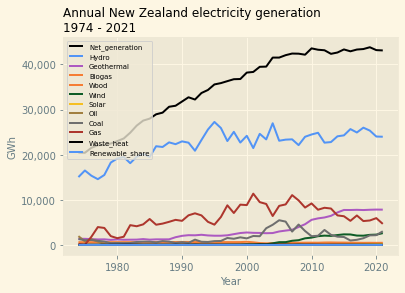

In [259]:
with plt.style.context(style=graph_style):
    df_GWh.plot(x='Calendar_year', 
                color =['black', hydro, geo, bio, bio, wind, solar, oil, coal, gas])
    plt.title('Annual New Zealand electricity generation \n1974 - 2021',
              fontsize='large', loc='left')
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('GWh', fontsize='medium')
    plt.legend(loc = 'upper left', fontsize='x-small')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

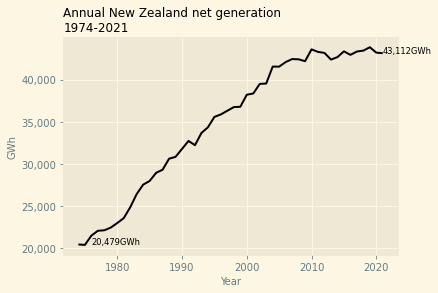

In [260]:
with plt.style.context(style=graph_style):
    df_GWh.plot(x='Calendar_year',y='Net_generation', color = 'black', legend=False)
    plt.title('Annual New Zealand net generation \n1974-2021',
              fontsize='large', loc='left')
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('GWh', fontsize='medium')
# future improvement pointers to dataframe
    plt.annotate('43,112GWh', xy=(2021, 43112), fontsize='small')
    plt.annotate('20,479GWh', xy=(1976, 20479), fontsize='small')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

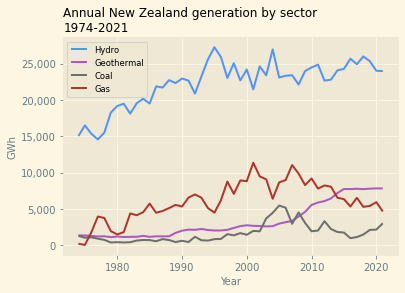

In [261]:
with plt.style.context(style=graph_style):
    #plt.figure(figsize=(16, 9))
    df_GWh.plot(x='Calendar_year',y=['Hydro','Geothermal','Coal','Gas'], 
                color=[hydro,geo,coal,gas])
    plt.title('Annual New Zealand generation by sector \n1974-2021',
              fontsize='large', loc='left')
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('GWh', fontsize='medium')
    plt.legend(loc = 'upper left', fontsize='small')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

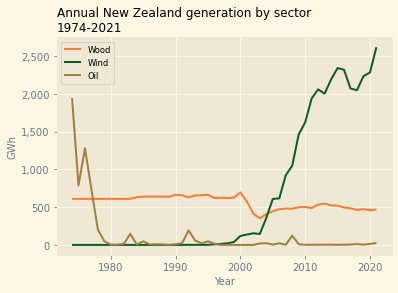

In [262]:
with plt.style.context(style=graph_style):
    #plt.figure(figsize=(16, 9))
    df_GWh.plot(x='Calendar_year',y=['Wood','Wind','Oil'], 
                color=[bio,wind,oil])
    plt.title('Annual New Zealand generation by sector \n1974-2021',
              fontsize='large', loc='left')
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('GWh', fontsize='medium')
    plt.legend(loc = 'upper left', fontsize='small')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

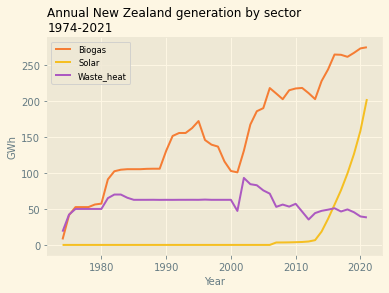

In [263]:
with plt.style.context(style=graph_style):
    df_GWh.plot(x='Calendar_year',y=['Biogas','Solar','Waste_heat'], 
                color=[bio,solar,geo])
    plt.title('Annual New Zealand generation by sector \n1974-2021',
              fontsize='large', loc='left')
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('GWh', fontsize='medium')
    plt.legend(loc = 'upper left', fontsize='small')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

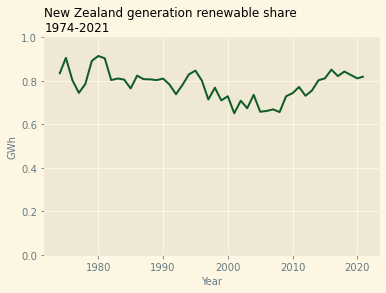

In [264]:
with plt.style.context(style=graph_style):
    df_GWh.plot(x='Calendar_year',y=['Renewable_share'], legend=False, color=wind)
    plt.title('New Zealand generation renewable share\n1974-2021',
              fontsize='large', loc='left')
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('GWh', fontsize='medium')
    plt.ylim(bottom=0, top=1)
plt.show()

## Ratio Hydro/ Total

In [265]:
df_GWh['ratio_hydro'] = df_GWh['Hydro']/df_GWh['Net_generation']
df_GWh.head()

<ipython-input-265-c7db077c02b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GWh['ratio_hydro'] = df_GWh['Hydro']/df_GWh['Net_generation']


number,Calendar_year,Net_generation,Hydro,Geothermal,Biogas,Wood,Wind,Solar,Oil,Coal,Gas,Waste_heat,Renewable_share,ratio_hydro
0,1974,"20,479.18","15,037.00","1,358.00",7.60,609.51,0.00,0.00,"1,943.00","1,297.00",208.65,18.43,0.83,0.73
1,1975,"20,423.63","16,497.00","1,350.00",41.35,609.51,0.00,0.00,787.00,"1,046.00",50.65,42.13,0.91,0.81
2,1976,"21,523.78","15,344.00","1,290.00",52.60,609.51,0.00,0.00,"1,280.00","1,097.00","1,800.65",50.03,0.80,0.71
3,1977,"22,095.78","14,573.00","1,217.00",52.60,609.51,0.00,0.00,729.00,910.00,"3,954.65",50.03,0.74,0.66
4,1978,"22,157.84","15,503.00","1,239.00",52.60,609.51,0.00,0.00,199.00,742.05,"3,762.65",50.03,0.79,0.70


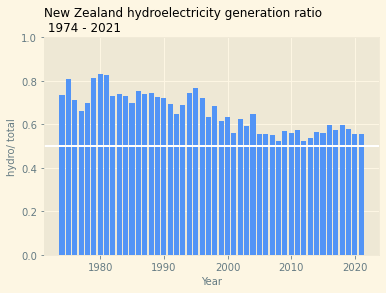

In [266]:
with plt.style.context(style=graph_style):
    plt.bar(df_GWh['Calendar_year'], df_GWh['ratio_hydro'], color=hydro)
    plt.title("New Zealand hydroelectricity generation ratio\n 1974 - 2021",
              fontsize='large', loc='left')
    plt.axhline(y=.5,color='white')
    plt.ylim(top=1)
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('hydro/ total', fontsize='medium')
    #plt.xticks(size='x-small', rotation=90)
plt.show()

## Printing table in markdown format

In [267]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [268]:
print(df_GWh.to_markdown(floatfmt=",.2f"))

|    |   Calendar_year |   Net_generation |     Hydro |   Geothermal |   Biogas |   Wood |        Wind |   Solar |         Oil |        Coal |          Gas |   Waste_heat |   Renewable_share |   ratio_hydro |
|---:|----------------:|-----------------:|----------:|-------------:|---------:|-------:|------------:|--------:|------------:|------------:|-------------:|-------------:|------------------:|--------------:|
|  0 |        1,974.00 |        20,479.18 | 15,037.00 |     1,358.00 |     7.60 | 609.51 |        0.00 |    0.00 | 1,943.00    | 1,297.00    |       208.65 |        18.43 |              0.83 |          0.73 |
|  1 |        1,975.00 |        20,423.63 | 16,497.00 |     1,350.00 |    41.35 | 609.51 |        0.00 |    0.00 |      787.00 | 1,046.00    |        50.65 |        42.13 |              0.91 |          0.81 |
|  2 |        1,976.00 |        21,523.78 | 15,344.00 |     1,290.00 |    52.60 | 609.51 |        0.00 |    0.00 | 1,280.00    | 1,097.00    |  1,800.65    |       

In [269]:
df_GWh.iloc[0]

number
Calendar_year      1,974.00
Net_generation    20,479.18
Hydro             15,037.00
Geothermal         1,358.00
Biogas                 7.60
Wood                 609.51
Wind                   0.00
Solar                  0.00
Oil                1,943.00
Coal               1,297.00
Gas                  208.65
Waste_heat            18.43
Renewable_share        0.83
ratio_hydro            0.73
Name: 0, dtype: float64

In [270]:
df_GWh.iloc[47,2:11]

number
Hydro        23,980.98
Geothermal    7,820.07
Biogas          274.82
Wood            468.96
Wind          2,615.67
Solar           202.81
Oil              25.20
Coal          3,022.31
Gas           4,662.96
Name: 47, dtype: float64

## Stack bar

In [271]:
dfs=df_GWh.loc[(df_GWh['Calendar_year'] == 1974)|
               (df_GWh['Calendar_year'] == 1981)|
               (df_GWh['Calendar_year'] == 1991)|
               (df_GWh['Calendar_year'] == 2001)|
               (df_GWh['Calendar_year'] == 2011)|
               (df_GWh['Calendar_year'] == 2021)]

width = 4      # the width of the bars: can also be len(x) sequence

dfs

number,Calendar_year,Net_generation,Hydro,Geothermal,Biogas,Wood,Wind,Solar,Oil,Coal,Gas,Waste_heat,Renewable_share,ratio_hydro
0,1974,"20,479.18","15,037.00","1,358.00",7.60,609.51,0.00,0.00,"1,943.00","1,297.00",208.65,18.43,0.83,0.73
7,1981,"23,594.85","19,483.00","1,141.00",91.15,609.51,0.00,0.00,3.00,389.52,"1,812.65",65.03,0.90,0.83
17,1991,"32,729.59","22,665.52","2,158.00",151.47,656.27,0.00,0.00,23.55,450.73,"6,561.40",62.65,0.78,0.69
27,2001,"38,343.93","21,464.36","2,677.78",100.88,574.61,137.60,0.00,0.00,"1,979.58","11,361.89",47.23,0.65,0.56
37,2011,"43,269.48","24,859.56","5,884.11",218.24,488.16,"1,937.65",4.09,2.08,"2,027.91","7,801.41",46.27,0.77,0.57
47,2021,"43,112.01","23,980.98","7,820.07",274.82,468.96,"2,615.67",202.81,25.20,"3,022.31","4,662.96",38.23,0.82,0.56


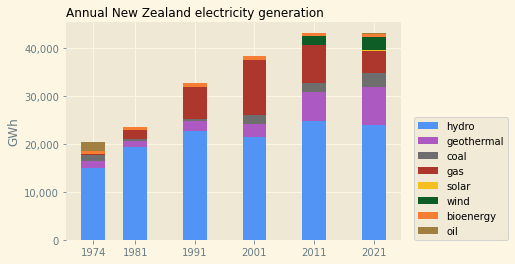

In [272]:
with plt.style.context(style=graph_style):
    fig, ax = plt.subplots()

    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
    bottom=0

    ax.bar(dfs['Calendar_year'], dfs['Hydro'],width, color=hydro, label='hydro')
    bottom= bottom+ np.array(dfs['Hydro'])
    
    # waste heat classified as geothermal source
    ax.bar(dfs['Calendar_year'], dfs['Geothermal']+dfs['Waste_heat'], width, color=geo, bottom=bottom, label='geothermal')
    bottom=bottom+np.array(dfs['Geothermal']+dfs['Waste_heat'])

    ax.bar(dfs['Calendar_year'], dfs['Coal'], width, color=coal, bottom=bottom,label='coal')
    bottom=bottom+np.array(dfs['Coal'])

    ax.bar(dfs['Calendar_year'], dfs['Gas'], width, color=gas, bottom=bottom,label='gas')
    bottom=bottom+np.array(dfs['Gas'])

    ax.bar(dfs['Calendar_year'], dfs['Solar'], width, color=solar, bottom=bottom,label='solar')
    bottom=bottom+np.array(dfs['Solar'])
    
    ax.bar(dfs['Calendar_year'], dfs['Wind'], width, color=wind, bottom=bottom,label='wind')
    bottom=bottom+np.array(dfs['Wind'])

    # wood and biogas classified as bioenergy source
    ax.bar(dfs['Calendar_year'], dfs['Wood']+dfs['Biogas'], width, color=bio, bottom=bottom,label='bioenergy')
    bottom=bottom+np.array(dfs['Wood']+dfs['Biogas'])

    ax.bar(dfs['Calendar_year'], dfs['Oil'], width, color=oil, bottom=bottom,label='oil')
    bottom=bottom+np.array(dfs['Oil'])

    ax.set_ylabel('GWh')
    ax.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks(dfs['Calendar_year'])
    
#     ticks_y = FuncFormatter(lambda x, pos: '{0:g}'.format(x/1000))
#     ax.yaxis.set_major_formatter(ticks_y)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))    
plt.title('Annual New Zealand electricity generation',
              fontsize='large', loc='left')
plt.show()

## Bubble Chart

### Class Bubble

https://matplotlib.org/3.5.0/gallery/misc/packed_bubbles.html#

In [273]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')




### 2021

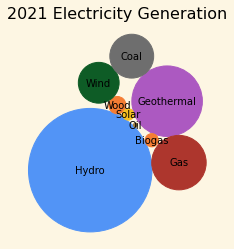

In [274]:
source_market_share = {
    'source': ['Hydro',
             'Geothermal',
             'Biogas',
             'Wood',
             'Wind',
             'Solar',
             'Oil',
             'Coal',
             'Gas',
             'Waste_heat',],
    'market_share': df_GWh.iloc[47,2:11],
    'color': [hydro,
             geo,
             bio,
             bio,
             wind,
             solar,
             oil,
             coal,
             gas,
             geo]
}


bubble_chart = BubbleChart(area=source_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

with plt.style.context(style=graph_style):
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
    bubble_chart.plot(
        ax, source_market_share['source'], source_market_share['color'])
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title('2021 Electricity Generation')
plt.show()

### 1974

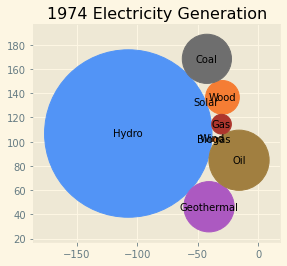

In [275]:
source_market_share = {
    'source': ['Hydro',
             'Geothermal',
             'Biogas',
             'Wood',
             'Wind',
             'Solar',
             'Oil',
             'Coal',
             'Gas',
             'Waste_heat',],
    'market_share': df_GWh.iloc[0,2:11],
    'color': [hydro,
             geo,
             bio,
             bio,
             wind,
             solar,
             oil,
             coal,
             gas,
             geo]
}



bubble_chart = BubbleChart(area=source_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

with plt.style.context(style=graph_style):
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
    bubble_chart.plot(
        ax, source_market_share['source'], source_market_share['color'])
    # ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title('1974 Electricity Generation')

plt.show()

### 2021 Main Generation

In [276]:
df_GWh.iloc[47,[2,3,6,8,9,10]]

number
Hydro        23,980.98
Geothermal    7,820.07
Wind          2,615.67
Oil              25.20
Coal          3,022.31
Gas           4,662.96
Name: 47, dtype: float64

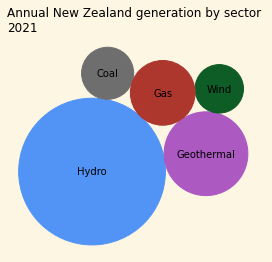

In [277]:
source_market_share = {
    'source': ['Hydro',
             'Geothermal',
             #'Biogas',
             #'Wood',
             'Wind',
             #'Solar',
             #'Oil',
             'Coal',
             'Gas',
             #'Waste_heat',
              ],
    'market_share': df_GWh.iloc[47,[2,3,6,9,10]],
    'color': [hydro,
             geo,
             #bio,
             #bio,
             wind,
             #solar,
             #oil,
             coal,
             gas,
             #geo
             ]
}


bubble_chart = BubbleChart(area=source_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

with plt.style.context(style=graph_style):
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
    bubble_chart.plot(
        ax, source_market_share['source'], source_market_share['color'])
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    plt.title('Annual New Zealand generation by sector \n2021',
              fontsize='large', loc='left')
    #ax.set_title('2021 Electricity Generation')
plt.show()

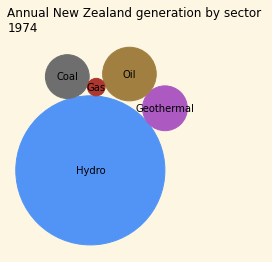

In [278]:
source_market_share = {
    'source': ['Hydro',
             'Geothermal',
             #'Biogas',
             #'Wood',
             #'Wind',
             #'Solar',
             'Oil',
             'Coal',
             'Gas',
             #'Waste_heat',
              ],
    'market_share': df_GWh.iloc[0,[2,3,8,9,10]],
    'color': [hydro,
             geo,
             #bio,
             #bio,
             #wind,
             #solar,
             oil,
             coal,
             gas,
             #geo
             ]
}


bubble_chart = BubbleChart(area=source_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

with plt.style.context(style=graph_style):
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
    bubble_chart.plot(
        ax, source_market_share['source'], source_market_share['color'])
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    plt.title('Annual New Zealand generation by sector \n1974',
              fontsize='large', loc='left')
    #ax.set_title('1974 Electricity Generation')
plt.show()